In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.ticker as ticker

In [2]:
file_path = "./ablations/generations/aspirin_0.4_sf/Sampling_results_aspirin_0.4_sf_302M_10K.xlsx"

df = pd.read_excel(file_path)
df

FileNotFoundError: [Errno 2] No such file or directory: './ablations/generations/aspirin_0.4_sf/Sampling_results_aspirin_0.4_sf_302M_10K.xlsx'

In [38]:
file_path_ls = "./ablations/generations/aspirin_0.4_sf_label_smoothed_eps_0.1/Sampling_results_aspirin_0.4_sf_label_smoothed_eps_0.1_10K.xlsx"

df_ls = pd.read_excel(file_path_ls)
df_ls

,Model,Non Valid Smiles,Canonical Smiles Unique,In_Subset Unique,In_GDB13 Unique,In_GDB13 & Subset Unique,Train Recall Unique,Generated Smiles count
0,OPT_iter_10000_temp_0.45_10K,0,9631,7192,8114,6196,814,10000
1,OPT_iter_10000_temp_0.4_10K,0,9180,6915,7741,5947,753,10000
2,OPT_iter_10000_temp_0.55_10K,0,9918,7072,8100,5912,744,10000
3,OPT_iter_10000_temp_0.5_10K,0,9832,7206,8194,6128,737,10000
4,OPT_iter_10000_temp_0.65_10K,0,9972,6509,7647,5240,616,10000
5,OPT_iter_10000_temp_0.6_10K,0,9964,6845,7914,5619,674,10000
6,OPT_iter_10000_temp_0.75_10K,0,9971,5523,6455,4082,496,10000
7,OPT_iter_10000_temp_0.7_10K,0,9982,5926,7105,4596,592,10000
8,OPT_iter_10000_temp_0.85_10K,0,9912,4030,4669,2567,300,10000


In [39]:
def extract_sampling_value(file_name, start_str, end_str):
    start_idx = file_name.index(start_str) + len(start_str)
    end_idx =  file_name.index(end_str)
    
    value = file_name[start_idx: end_idx]
    
    return value

In [40]:
df['sample_ckpt'] = df['Model'].apply(lambda x: x.split("OPT_")[1].split("_temp")[0])
df_ls['sample_ckpt'] = df_ls['Model'].apply(lambda x: x.split("OPT_")[1].split("_temp")[0])

In [41]:
df['sample_val'] = df['Model'].apply(lambda x: extract_sampling_value(x, "temp_", "_10K"))
df = df.sort_values("sample_val")

df_ls['sample_val'] = df_ls['Model'].apply(lambda x: extract_sampling_value(x, "temp_", "_10K"))
df_ls = df_ls.sort_values("sample_val")


In [42]:
df_1k = df[df["sample_ckpt"]=="iter_1000"]
df_10k = df[df["sample_ckpt"]=="iter_10000"]
df_30k = df[df["sample_ckpt"]=="iter_30000"]


df_ls_1k = df_ls[df_ls["sample_ckpt"]=="iter_1000"]
df_ls_10k = df_ls[df_ls["sample_ckpt"]=="iter_10000"]
df_ls_30k = df_ls[df_ls["sample_ckpt"]=="iter_30000"]

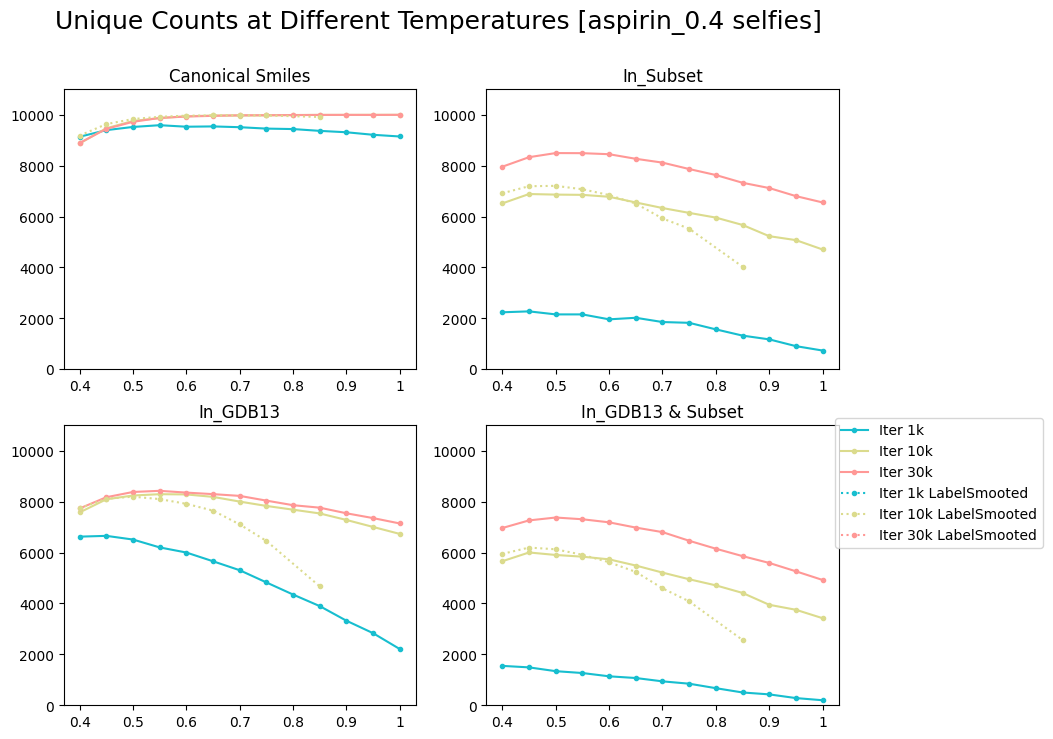

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.suptitle("Unique Counts at Different Temperatures [aspirin_0.4 selfies]", fontsize=18)

axs[0,0].set_title('Canonical Smiles')
axs[0,0].plot(df_1k["sample_val"], df_1k["Canonical Smiles Unique"], label="Iter 1k", marker="o", markersize=3, c="#17becf", linestyle="solid")
axs[0,0].plot(df_10k["sample_val"], df_10k["Canonical Smiles Unique"], label="Iter 10k", marker="o", markersize=3, c="#dbdb8d", linestyle="solid")
axs[0,0].plot(df_30k["sample_val"], df_30k["Canonical Smiles Unique"], label="Iter 10k", marker="o", markersize=3, c="#ff9896", linestyle="solid")

axs[0,0].plot(df_ls_1k["sample_val"], df_ls_1k["Canonical Smiles Unique"], label="Iter 1k", marker="o", markersize=3, c="#17becf", linestyle="dotted")
axs[0,0].plot(df_ls_10k["sample_val"], df_ls_10k["Canonical Smiles Unique"], label="Iter 10k", marker="o", markersize=3, c="#dbdb8d", linestyle="dotted")
axs[0,0].plot(df_ls_30k["sample_val"], df_ls_30k["Canonical Smiles Unique"], label="Iter 10k", marker="o", markersize=3, c="#ff9896", linestyle="dotted")


axs[0,0].set_ylim([0, 11000])
axs[0,0].set_xticks(['0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])

axs[0,1].set_title('In_Subset')
axs[0,1].plot(df_1k["sample_val"], df_1k["In_Subset Unique"], label="Iter 1k", marker="o", markersize=3, c="#17becf", linestyle="solid")
axs[0,1].plot(df_10k["sample_val"], df_10k["In_Subset Unique"], label="Iter 10k", marker="o", markersize=3, c="#dbdb8d", linestyle="solid")
axs[0,1].plot(df_30k["sample_val"], df_30k["In_Subset Unique"], label="Iter 10k", marker="o", markersize=3, c="#ff9896", linestyle="solid")
axs[0,1].plot(df_ls_1k["sample_val"], df_ls_1k["In_Subset Unique"], label="Iter 1k", marker="o", markersize=3, c="#17becf", linestyle="dotted")
axs[0,1].plot(df_ls_10k["sample_val"], df_ls_10k["In_Subset Unique"], label="Iter 10k", marker="o", markersize=3, c="#dbdb8d", linestyle="dotted")
axs[0,1].plot(df_ls_30k["sample_val"], df_ls_30k["In_Subset Unique"], label="Iter 10k", marker="o", markersize=3, c="#ff9896", linestyle="dotted")

axs[0,1].set_ylim([0, 11000])
axs[0,1].set_xticks(['0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])

axs[1,0].set_title('In_GDB13')
axs[1,0].plot(df_1k["sample_val"], df_1k["In_GDB13 Unique"], label="Iter 1k", marker="o", markersize=3, c="#17becf", linestyle='solid')
axs[1,0].plot(df_10k["sample_val"], df_10k["In_GDB13 Unique"], label="Iter 10k", marker="o", markersize=3, c="#dbdb8d", linestyle='solid')
axs[1,0].plot(df_30k["sample_val"], df_30k["In_GDB13 Unique"], label="Iter 30k", marker="o", markersize=3, c="#ff9896", linestyle='solid')
axs[1,0].plot(df_ls_1k["sample_val"], df_ls_1k["In_GDB13 Unique"], label="Iter 1k LabelSmooted", marker="o", markersize=3, c="#17becf", linestyle='dotted')
axs[1,0].plot(df_ls_10k["sample_val"], df_ls_10k["In_GDB13 Unique"], label="Iter 10k LabelSmooted", marker="o", markersize=3, c="#dbdb8d", linestyle='dotted')
axs[1,0].plot(df_ls_30k["sample_val"], df_ls_30k["In_GDB13 Unique"], label="Iter 30k LabelSmooted", marker="o", markersize=3, c="#ff9896", linestyle='dotted')

axs[1,0].set_ylim([0, 11000])
axs[1,0].set_xticks(['0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])

axs[1,1].set_title('In_GDB13 & Subset')
axs[1,1].plot(df_1k["sample_val"], df_1k["In_GDB13 & Subset Unique"], label=f"Iter 1k", marker="o", markersize=3, c="#17becf", linestyle='solid')
axs[1,1].plot(df_10k["sample_val"], df_10k["In_GDB13 & Subset Unique"], label=f"Iter 10k", marker="o", markersize=3, c="#dbdb8d", linestyle='solid')
axs[1,1].plot(df_30k["sample_val"], df_30k["In_GDB13 & Subset Unique"], label=f"Iter 30k", marker="o", markersize=3, c="#ff9896", linestyle='solid')
axs[1,1].plot(df_ls_1k["sample_val"], df_ls_1k["In_GDB13 & Subset Unique"], label=f"Iter 1k LabelSmooted", marker="o", markersize=3, c="#17becf", linestyle='dotted')
axs[1,1].plot(df_ls_10k["sample_val"], df_ls_10k["In_GDB13 & Subset Unique"], label=f"Iter 10k LabelSmooted", marker="o", markersize=3, c="#dbdb8d", linestyle='dotted')
axs[1,1].plot(df_ls_30k["sample_val"], df_ls_30k["In_GDB13 & Subset Unique"], label=f"Iter 30k LabelSmooted", marker="o", markersize=3, c="#ff9896", linestyle='dotted')
axs[1,1].set_ylim([0, 11000])
axs[1,1].set_xticks(['0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])

# plt.plot(temp_df_aa["sample_val"], temp_df_aa["Canonical Smiles Unique"], label="Canonical Smiles [Simple]", marker="o", markersize=5, linestyle='dashed', c="#ff9896")
# plt.plot(temp_df_aa["sample_val"], temp_df_aa["In_Subset Unique"], label="In_Subset [Simple]", marker="o", markersize=5, linestyle='dashed', c="#2ca02c")
# plt.plot(temp_df_aa["sample_val"], temp_df_aa["In_GDB13 Unique"], label="In_GDB13 [Simple]", marker="o", markersize=5, linestyle='dashed', c="#dbdb8d")
# plt.plot(temp_df_aa["sample_val"], temp_df_aa["In_GDB13 & Subset Unique"], label="In_GDB13 & Subset [Simple]", marker="o", markersize=5, linestyle='dashed', c="#17becf")



plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05));

In [93]:
import pandas as pd

df_asp = pd.read_csv("/mnt/2tb/chem/aspirin_similarity_subspace_8M.csv")
df_asp

,name
0,Oc1ccco1
1,O=C1CC(O)C1
2,OC1C=COC=C1
3,O=C1C=CC(O)C1
4,O=CC1CCC1=O
...,...
8284275,Cc1c(O)cc(OC=O)cc1C=O
8284276,Cc1c(C=O)cc(O)cc1OC=O
8284277,CC(=O)c1cc(O)ccc1OC=O
8284278,CC(=O)Oc1ccccc1C(=O)O


In [100]:
from tqdm import tqdm
import json 
import selfies as sf

with open("/mnt/2tb/chem/aspirin_0.4_8M.jsonl", "w", encoding="utf-8") as f:
    for sm in tqdm(df_asp["name"].values):
        json.dump({"text":  sf.encoder(sm)}, f)
        f.write("\n")

100%|██████████| 8284280/8284280 [24:27<00:00, 5643.68it/s]
